<a href="https://colab.research.google.com/github/MinhQuang31751/Python/blob/main/movies_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.BỘ DỮ LIỆU CỦA MOVIES


## 2.1.Data cleaing

###**2.1.1 Chuẩn bị và Kiểm tra an toàn**

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/PTDL_PY/Bản sao của movies.csv')
display(df)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


###**2.1.2. Xử lý Giá trị Bị thiếu (Missing Values)**

In [ ]:
print(df.isnull().sum())


movieId    0
title      0
genres     0
dtype: int64


**Đánh giá**

- không có cột có giá trị bị null

###2.1.3.Thông tin tổng quan về các cột

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


##**2.2.EDA Và Trực Quan Hóa Dữ Liệu**

###**2.2.1. PHÂN TÍCH THỂ LOẠI (GENRES)**

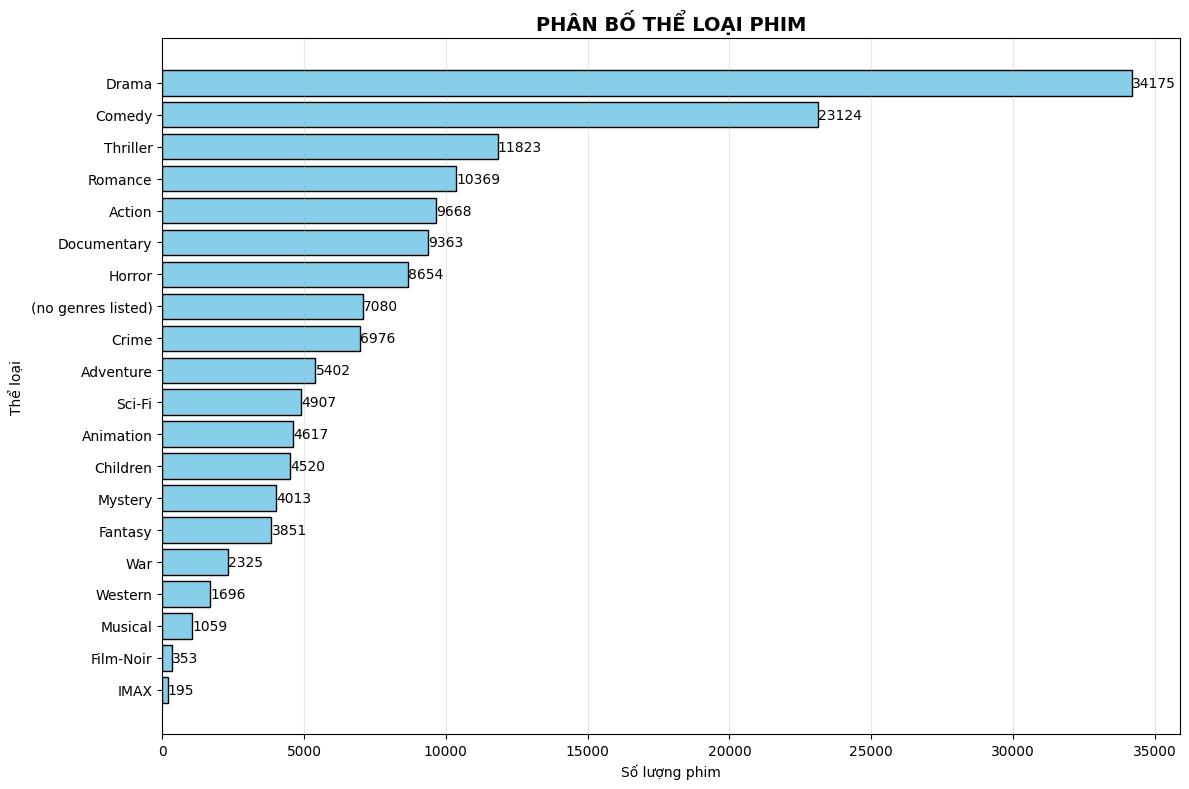

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Thiết lập style
plt.style.use('default')
sns.set_palette("husl")

# 1. PHÂN TÍCH THỂ LOẠI (GENRES)
# Tách các thể loại
all_genres = []
for genres in df['genres']:
    if isinstance(genres, str):
        genre_list = [genre.strip() for genre in genres.split('|')]
        all_genres.extend(genre_list)

genre_counts = Counter(all_genres)

# Biểu đồ 1: Phân bố thể loại phim
plt.figure(figsize=(12, 8))
genres_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=True)
plt.barh(genres_df['Genre'], genres_df['Count'], color='skyblue', edgecolor='black')
plt.xlabel('Số lượng phim')
plt.ylabel('Thể loại')
plt.title('PHÂN BỐ THỂ LOẠI PHIM', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, v in enumerate(genres_df['Count']):
    plt.text(v + 0.1, i, str(v), va='center')
plt.tight_layout()
plt.show()

 ### **2.2.2.BIỂU ĐỒ SỐ LƯỢNG THỂ LOẠI MỖI PHIM**

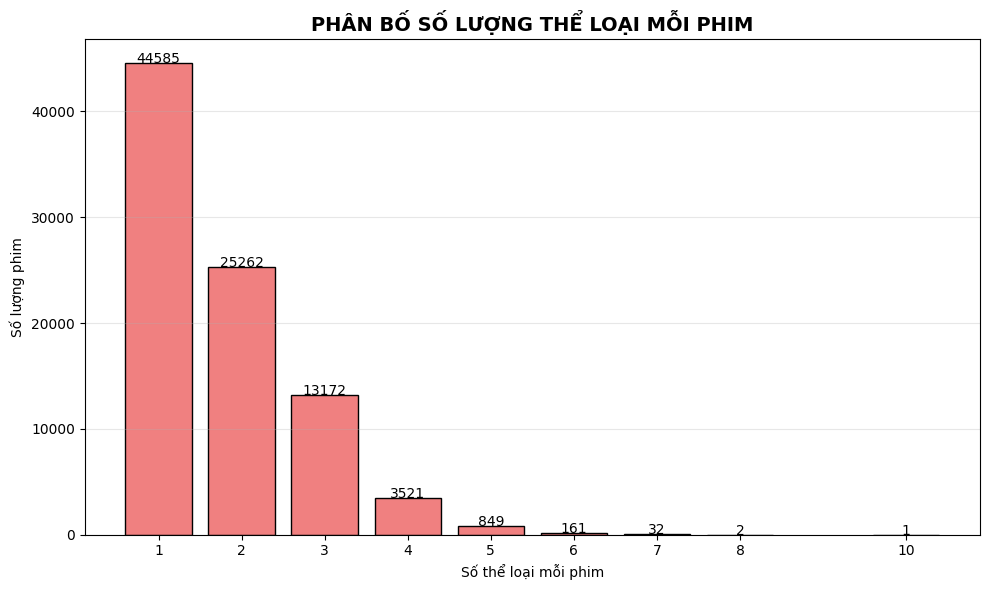

In [ ]:
# 2. BIỂU ĐỒ SỐ LƯỢNG THỂ LOẠI MỖI PHIM
plt.figure(figsize=(10, 6))
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')) if isinstance(x, str) else 0)
genre_count_dist = df['num_genres'].value_counts().sort_index()

plt.bar(genre_count_dist.index, genre_count_dist.values, color='lightcoral', edgecolor='black')
plt.xlabel('Số thể loại mỗi phim')
plt.ylabel('Số lượng phim')
plt.title('PHÂN BỐ SỐ LƯỢNG THỂ LOẠI MỖI PHIM', fontsize=14, fontweight='bold')
plt.xticks(genre_count_dist.index)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(genre_count_dist.values):
    plt.text(genre_count_dist.index[i], v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()

###**2.2.3.BIỂU ĐỒ PIE CHART THỂ LOẠI**

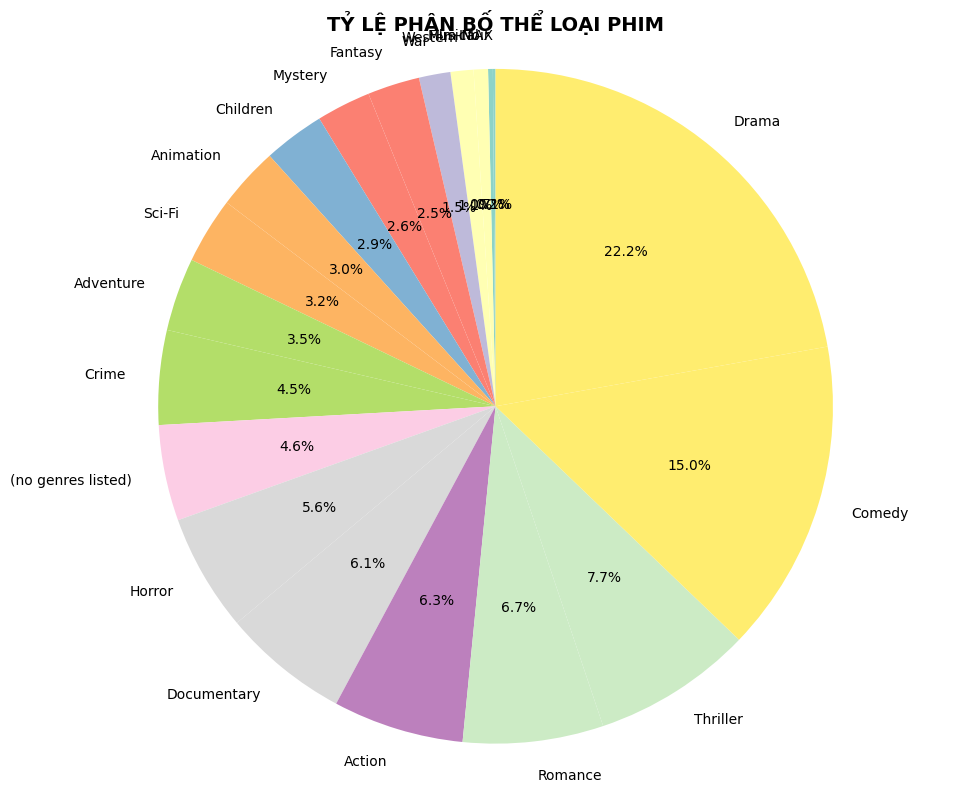

In [ ]:

# 3. BIỂU ĐỒ PIE CHART THỂ LOẠI
plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(genre_counts)))
plt.pie(genres_df['Count'], labels=genres_df['Genre'], autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title('TỶ LỆ PHÂN BỐ THỂ LOẠI PHIM', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

###**2.2.4.TOP 5 THỂ LOẠI PHỔ BIẾN NHẤT**

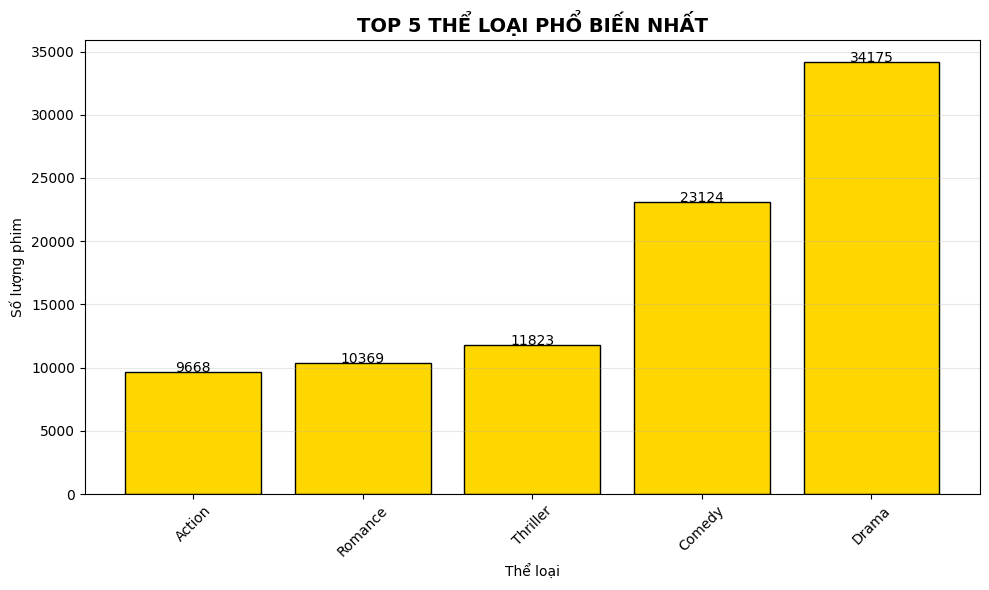

In [ ]:
# 4. BIỂU ĐỒ TOP 5 THỂ LOẠI PHỔ BIẾN NHẤT
plt.figure(figsize=(10, 6))
top_genres = genres_df.tail(5)  # Top 5 thể loại phổ biến nhất
plt.bar(top_genres['Genre'], top_genres['Count'], color='gold', edgecolor='black')
plt.xlabel('Thể loại')
plt.ylabel('Số lượng phim')
plt.title('TOP 5 THỂ LOẠI PHỔ BIẾN NHẤT', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(top_genres['Count']):
    plt.text(i, v + 0.1, str(v), ha='center')
plt.tight_layout()
plt.show()